In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd

In [2]:
# Tolerances of electronic components
# Used to initialize the class

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

In [3]:
# Initialize Class
from PSU_class import PSU

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)
model.P_in()

array([ 9.28592306, 10.85749529, 12.66975792])

In [4]:
# Number of simulations
n_simulation = 20000

In [5]:
# Simulate output with parameters with Uniform Distribution
from helper_functions import simulation

uni_simulation = simulation(n_simulation, model, PSU, "Gauss")

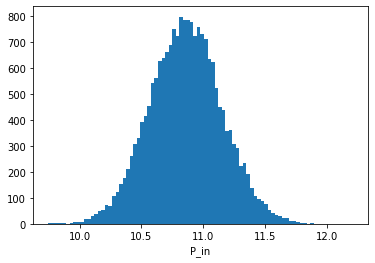

In [6]:
# Plot historgram
plt.hist(uni_simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

### Chi-Square

In [7]:
from helper_functions import compute_chi_square

results = compute_chi_square(uni_simulation)

Distribution: weibull_min || Parameters: (3.332386612797884, -3.0043240494212755, 3.3492153059235132)
Distribution: norm || Parameters: (4.269056763423949e-15, 1.0)
Distribution: weibull_max || Parameters: (0.8519232629349781, 2.5215673781708534, 1.388592399390256)
Distribution: beta || Parameters: (3.9377616331159238, 4.048046627117414, -2.9649332793769303, 6.013148730742705)
Distribution: invgauss || Parameters: (0.020102690806513033, -7.287030180682683, 361.7425132426739)
Distribution: uniform || Parameters: (-2.5024071672277546, 5.023974545398607)
Distribution: gamma || Parameters: (9099.18528609151, -95.39050846889921, 0.010483402843555211)
Distribution: expon || Parameters: (-2.5024071672277546, 2.502407167227759)
Distribution: lognorm || Parameters: (0.017936779735403058, -55.677432190390164, 55.66866995688652)
Distribution: pearson3 || Parameters: (0.030696791276754135, 5.642742644687465e-15, 1.0000130406127972)
Distribution: triang || Parameters: (0.49582266787702645, -2.53767

## Choose Model

### Non-Nested Likelihood Ratio Test

In [8]:
from helper_functions import LRT

Q, qQi = LRT(results.iloc[:2], 1000, n_simulation)
if Q < qQi: print('Select model A')

### Q-Q Plot

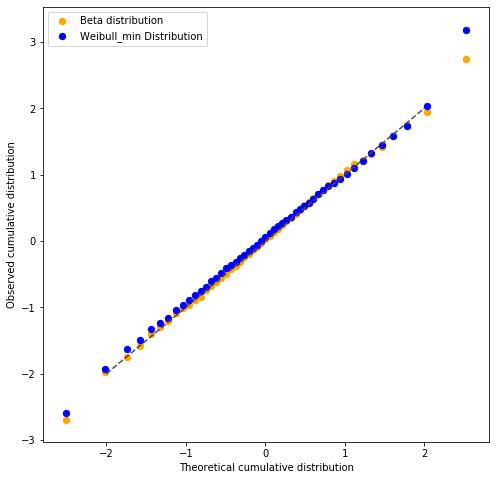

In [10]:
from helper_functions import standarize

y_std,_,_ = standarize(uni_simulation, 0.99, 0.01)

params1 = results.iloc[0]['Parameters']
params2 = results.iloc[1]['Parameters']

data_points = scipy.stats.weibull_min.rvs(*params1, size=2000)   
data_points2 = scipy.stats.beta.rvs(*params2,size = 2000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 2], [-2, 2], ls="--", c=".3")

percentile_bins = np.linspace(0,100,51)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_weibull_min= np.percentile(data_points, percentile_bins)


percentile_cutoffs_beta = np.percentile(data_points2, percentile_bins)


ax.scatter(percentile_cutoffs1,percentile_cutoffs_beta,c='orange',label = 'Beta distribution',s = 40)
ax.scatter(percentile_cutoffs1,percentile_cutoffs_weibull_min,c='blue',label = 'Weibull_min Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()

In [11]:
import seaborn as sns
uni_simulation_std, _, _ = standarize(uni_simulation, 0.99, 0.01)

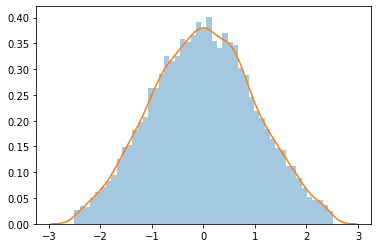

In [12]:
sns.distplot(a = uni_simulation_std, kde = False, norm_hist=True)
sns.kdeplot(data = uni_simulation_std, shade= False)

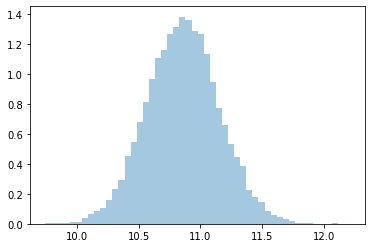

In [26]:
sns.distplot(a = uni_simulation, kde = False, norm_hist=True)

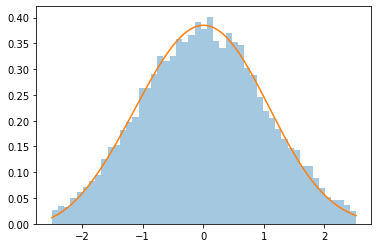

In [14]:
sns.distplot(a = uni_simulation_std, kde = False, norm_hist=True)
plt.plot(uni_simulation_std, scipy.stats.weibull_min.pdf(uni_simulation_std,*params1))

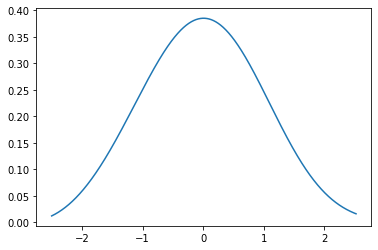

In [24]:
plt.plot(uni_simulation_std, scipy.stats.weibull_min.pdf(uni_simulation_std,*params1))

### Kolmogorov-Smirnoff 2 Sample Test

In [15]:
from scipy.stats import ks_2samp

In [16]:
data1 = np.random.choice(a = uni_simulation_std, size = 2000)
data2 = data_points
test = ks_2samp(data1,data2)
print(test)

Ks_2sampResult(statistic=0.039, pvalue=0.0954673206906231)


In [17]:
test_statistic = 0.0245

In [18]:
n1 = 2000
n2 = 2000
alpha = 0.05
c_alpha = 1.36 # Make a dict mapping c values to alpha
critical_value = c_alpha * ((n1 + n2)/(n1*n2))**0.5 
critical_value

0.04300697617828996

In [19]:
if test_statistic > critical_value:
    print('The two samples come from different distributions')
else:
    print('The two samples come from same distributions')

The two samples come from same distributions


### Confidence Intervals

### Cp

In [21]:
sigma = params1[1]
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
Cp = (limit_MAX - limit_min)/(6 * sigma)
Cp

-0.18772025529117203